Adatok beolvasása

In [1]:
import pandas as pd

pd.options.display.max_colwidth = 500

df = pd.read_csv("data/trump20200926.csv")

df['letoltes_datum'] = pd.to_datetime(df.letoltes_datum, format='%Y-%m-%d')
df['tweetCreated'] = pd.to_datetime(df.tweetCreated, format='%Y-%m-%d')
df['userCreateDt'] = pd.to_datetime(df.userCreateDt, format='%Y-%m-%d')

print(df.shape)

df.dtypes


(10000, 24)


tweetID                     int64
tweetText                  object
tweetRetweetCt              int64
tweetFavoriteCt             int64
tweetSource                object
tweetCreated       datetime64[ns]
userID                      int64
userScreen                 object
userName                   object
userCreateDt       datetime64[ns]
userDesc                   object
userFollowerCt              int64
userFriendsCt               int64
userLocation               object
userTimezone              float64
Coordinates                object
GeoEnabled                   bool
Language                  float64
TweetPlace                 object
text                       object
text2                      object
text3                      object
keresoszo                  object
letoltes_datum     datetime64[ns]
dtype: object

Írásjelek törlése

In [2]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stop_words
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

In [3]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 


stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['rt','via', 'dr', 'ex', 'trump']
stopwords.extend(newStopWords)

stop_words=stopwords

df['cleaned_tweets']=df['tweetText'].apply(lambda x: process_text(x))


In [4]:
df['cleaned_tweets'].head()

0    biden endorsed presidents presidential candidates governors military officers foreign policy
1                                                            wrong thought would gone judge lagoa
2                                                                                      matter win
3                                                                attended many game grew presence
4                                                     debate explain amp american people lost fou
Name: cleaned_tweets, dtype: object


Bad key "text.kerning_factor" on line 4 in
/Users/domokla/opt/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


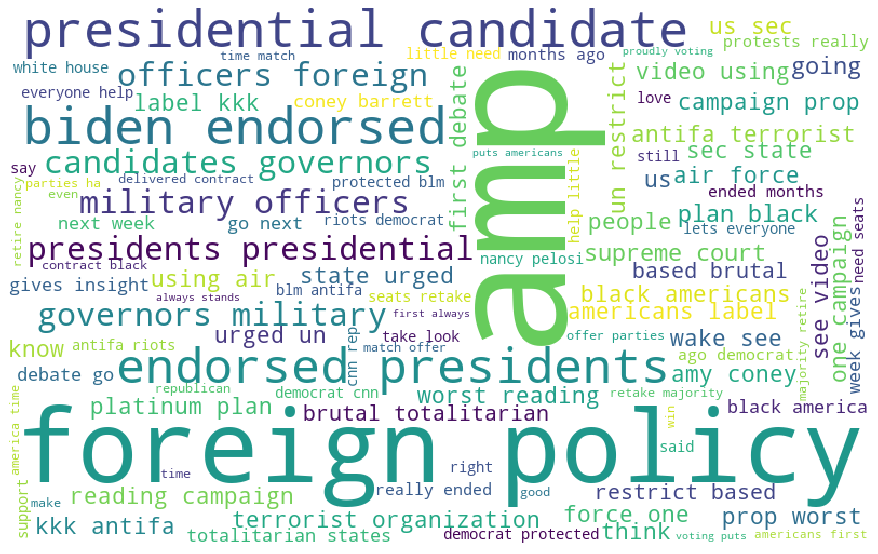

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(df['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()